In [1]:
import sklearn
print(sklearn.__version__)

1.2.2


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler

In [3]:
from imblearn.pipeline import Pipeline

In [4]:
from collections import Counter

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
# importing neccessary libraries 
import pandas as pd 
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, BertPreTrainedModel, BertModel,AdamW
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [7]:
df = pd.read_csv('/kaggle/input/womenclothing/Womens Clothing E-Commerce Reviews.csv')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [8]:
df.shape

(23486, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [10]:
# Check for null values in the DataFrame
print(df.isnull().sum())

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [11]:
print(df.columns)        

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


In [12]:
# List of unnecessary columns to remove
unnecessary_columns = ['Clothing ID', 'Title']

# Remove the unnecessary columns
df.drop(columns=unnecessary_columns, inplace=True)

# Print the updated DataFrame
print(df)

       Unnamed: 0  Age                                        Review Text  \
0               0   33  Absolutely wonderful - silky and sexy and comf...   
1               1   34  Love this dress!  it's sooo pretty.  i happene...   
2               2   60  I had such high hopes for this dress and reall...   
3               3   50  I love, love, love this jumpsuit. it's fun, fl...   
4               4   47  This shirt is very flattering to all due to th...   
...           ...  ...                                                ...   
23481       23481   34  I was very happy to snag this dress at such a ...   
23482       23482   48  It reminds me of maternity clothes. soft, stre...   
23483       23483   31  This fit well, but the top was very see throug...   
23484       23484   28  I bought this dress for a wedding i have this ...   
23485       23485   52  This dress in a lovely platinum is feminine an...   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \


In [13]:
# Drop rows with null values
df.dropna(inplace=True)

# Print the updated DataFrame
print(df)

       Unnamed: 0  Age                                        Review Text  \
0               0   33  Absolutely wonderful - silky and sexy and comf...   
1               1   34  Love this dress!  it's sooo pretty.  i happene...   
2               2   60  I had such high hopes for this dress and reall...   
3               3   50  I love, love, love this jumpsuit. it's fun, fl...   
4               4   47  This shirt is very flattering to all due to th...   
...           ...  ...                                                ...   
23481       23481   34  I was very happy to snag this dress at such a ...   
23482       23482   48  It reminds me of maternity clothes. soft, stre...   
23483       23483   31  This fit well, but the top was very see throug...   
23484       23484   28  I bought this dress for a wedding i have this ...   
23485       23485   52  This dress in a lovely platinum is feminine an...   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \


In [14]:
# Check for null values in the DataFrame
print(df.isnull().sum())

Unnamed: 0                 0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import string 
import re
from nltk.corpus import stopwords

In [17]:
# Function to clean the text
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)
    
    # Remove URLs and email addresses
    text = re.sub(r'http\S+|www\S+|[\w\.-]+@[\w\.-]+', '', text)
    
    # Remove special characters and symbols
    text = re.sub(r'[^\w\s]', '', text)
    
    # Lowercase the text
    text = text.lower()
    
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the cleaning function to the 'Text' column
df['Review Text'] = df['Review Text'].apply(clean_text)

# Print the updated DataFrame
print(df.head())

   Unnamed: 0  Age                                        Review Text  Rating  \
0           0   33        absolutely wonderful silky sexy comfortable       4   
1           1   34  love dress sooo pretty happened find store im ...       5   
2           2   60  high hopes dress really wanted work initially ...       3   
3           3   50  love love love jumpsuit fun flirty fabulous ev...       5   
4           4   47  shirt flattering due adjustable front tie perf...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dre

In [18]:
import os
os.makedirs('/kaggle/working/womenclothing')

In [19]:
df.to_csv('/kaggle/working/womenclothing/customer_reviews.csv', index=False)


In [20]:
df['Rating'] = df['Rating'].astype(int)

In [21]:
print(df['Rating'].value_counts()) #checking the data range 

Rating
5    12527
4     4908
3     2823
2     1549
1      821
Name: count, dtype: int64


In [22]:
print(df['Rating'].isnull().sum())

0


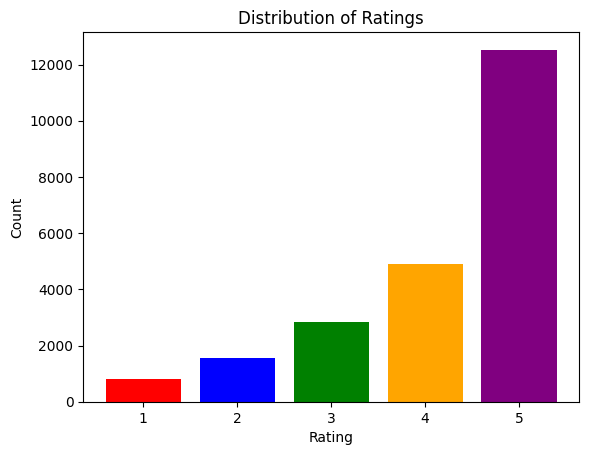

In [23]:
import matplotlib.pyplot as plt

# Defining the x and y values
x = [1, 2, 3, 4, 5]
y = [821, 1549, 2823, 4908, 12527]

# Creating a bar chart of the ratings data
plt.bar(x, y)

# Defining the colors for the bars
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Creating a bar chart with different colors
plt.bar(x, y, color=colors)


# Setting the chart title and axis labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Displaying the chart
plt.show()

In [24]:
# Read in the CSV file containing the ratings and reviews
df = pd.read_csv("/kaggle/working/womenclothing/customer_reviews.csv")

# Define the function to map ratings to sentiment labels
def map_rating_to_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

# Map the ratings to sentiment labels and add the column to the DataFrame
df["Sentiment"] = df["Rating"].apply(map_rating_to_sentiment)

# Select the "Sentiment", "Rating", and "Review Text" columns
df = df[["Sentiment", "Rating", "Review Text"]]

# Print the first few rows of the DataFrame to verify the new column
print(df.head())

  Sentiment  Rating                                        Review Text
0  positive       4        absolutely wonderful silky sexy comfortable
1  positive       5  love dress sooo pretty happened find store im ...
2   neutral       3  high hopes dress really wanted work initially ...
3  positive       5  love love love jumpsuit fun flirty fabulous ev...
4  positive       5  shirt flattering due adjustable front tie perf...


In [25]:
df.to_csv("/kaggle/working/womenclothing/updated_customer_reviews.csv", index=False)
df

,Sentiment,Rating,Review Text
0,positive,4,absolutely wonderful silky sexy comfortable
1,positive,5,love dress sooo pretty happened find store im ...
2,neutral,3,high hopes dress really wanted work initially ...
3,positive,5,love love love jumpsuit fun flirty fabulous ev...
4,positive,5,shirt flattering due adjustable front tie perf...
...,...,...,...
22623,positive,5,happy snag dress great price easy slip flatter...
22624,neutral,3,reminds maternity clothes soft stretchy shiny ...
22625,neutral,3,fit well top see never would worked im glad ab...
22626,neutral,3,bought dress wedding summer cute unfortunately...


In [26]:
df['Sentiment'].value_counts()

Sentiment
positive    17435
neutral      2823
negative     2370
Name: count, dtype: int64

# Dealing with imbalanced data 

In [27]:
X_text = df['Review Text']  # Text data```
y = df['Sentiment']  # Target variable

In [28]:
# Convert sentiment labels to 2, 1, 0
label_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
y = y.map(label_mapping)

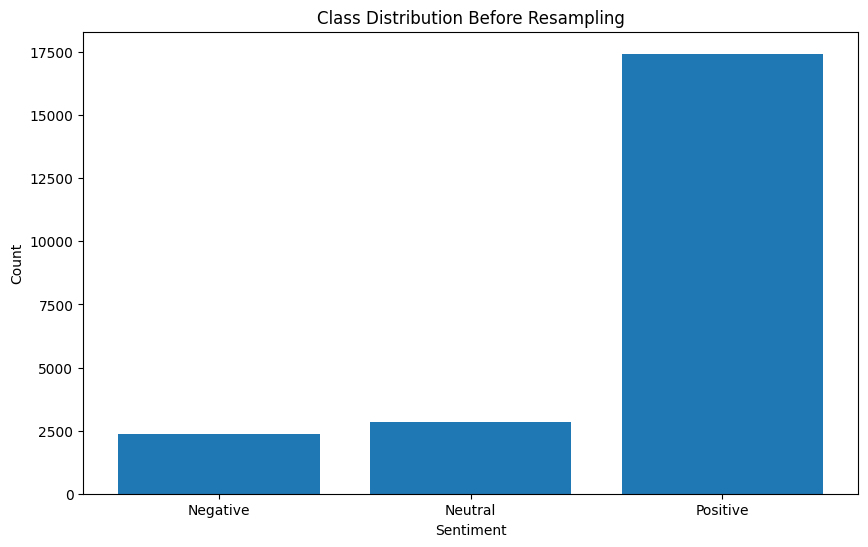

In [29]:
# Visualize the class distribution before resampling
plt.figure(figsize=(10, 6))
plt.bar(Counter(y).keys(), Counter(y).values())
plt.title('Class Distribution Before Resampling')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'])
plt.show()

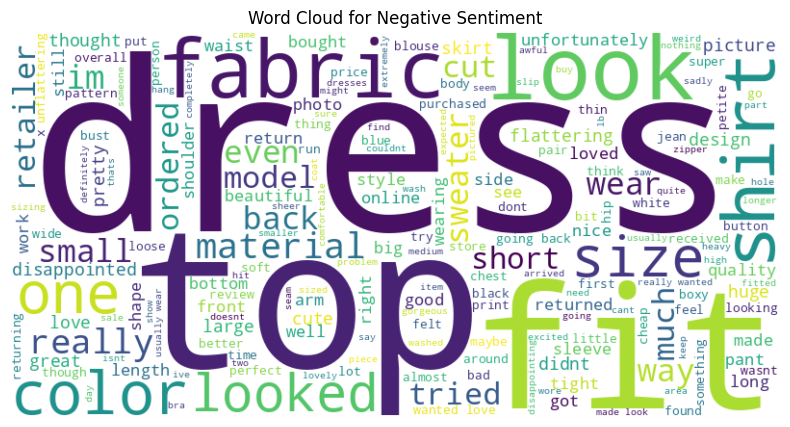

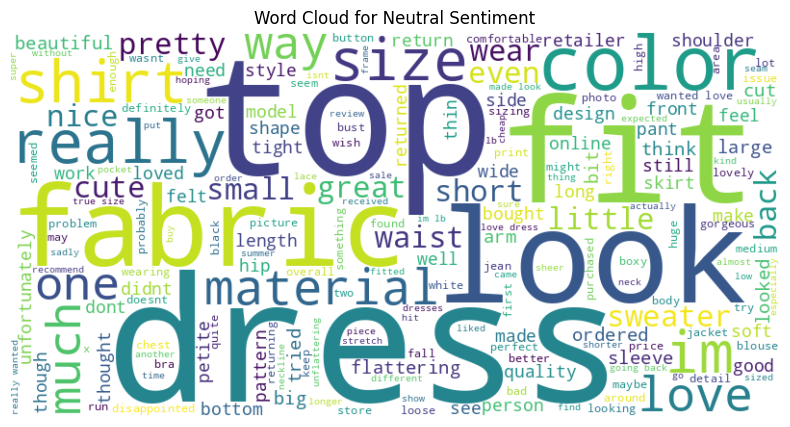

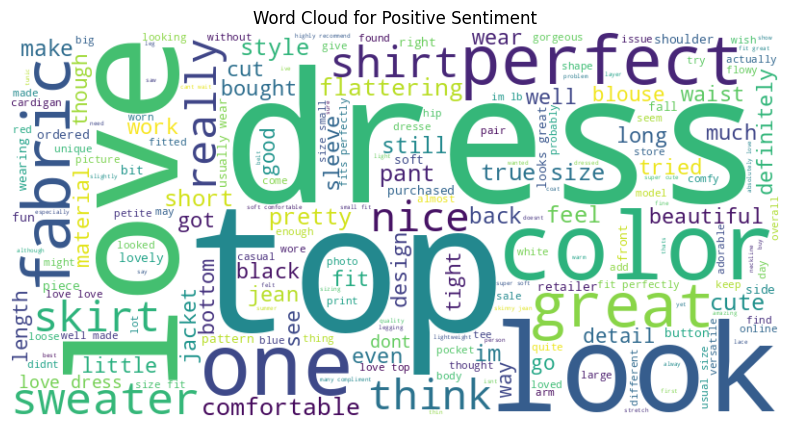

In [30]:
# Create word clouds for each sentiment label
sentiments = ['negative', 'neutral', 'positive']

for sentiment in sentiments:
    # Filter texts by sentiment
    texts = df[df['Sentiment'] == sentiment]['Review Text'].tolist()
    text = ' '.join(texts)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

In [31]:
# Define the resampling techniques
# Define the resampling techniques
over_sampling_strategy = {2: 17435, 1: 17435, 0: 17435}
under_sampling_strategy = {2: 17435, 1: 17435, 0: 17435}
over_sampler = SMOTE(sampling_strategy=over_sampling_strategy)
under_sampler = RandomUnderSampler(sampling_strategy=under_sampling_strategy)


In [32]:
# Define the pipeline for TF-IDF transformation
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text data to TF-IDF features
])

# Apply TF-IDF transformation
X_tfidf = tfidf_pipeline.fit_transform(X_text)

# Define the pipeline for resampling
resampling_pipeline = Pipeline([
    ('o', over_sampler),  # Oversample minority classes
    ('u', under_sampler)  # Undersample majority classes
])

In [33]:
# Apply resampling
X_resampled, y_resampled = resampling_pipeline.fit_resample(X_tfidf, y)

In [34]:
# Print the output of each step in the pipeline
print("Output after TF-IDF transformation:")
print(X_resampled)

Output after TF-IDF transformation:
  (0, 4591)	0.006343735886344085
  (0, 10561)	0.010088858639949376
  (0, 15999)	0.010659063134445652
  (0, 5132)	0.009383331635490131
  (0, 14026)	0.012914477552975942
  (0, 11857)	0.016879789545231647
  (0, 12894)	0.2950060421146168
  (0, 9862)	0.27710493817894594
  (0, 13757)	0.2911411191250712
  (0, 15852)	0.8339616477831352
  (1, 10773)	0.0807436081933682
  (1, 16265)	0.04557567399051879
  (1, 16097)	0.07100231578198377
  (1, 6640)	0.045902514815232394
  (1, 8947)	0.07993986364676631
  (1, 950)	0.09738348004525321
  (1, 15156)	0.0685856337606289
  (1, 10139)	0.058123194697942214
  (1, 6484)	0.07148026603016588
  (1, 8910)	0.07531032435560163
  (1, 8462)	0.0647777909705678
  (1, 5347)	0.05012685632495418
  (1, 982)	0.05721067766604931
  (1, 15315)	0.06788049092633613
  (1, 13119)	0.09709779440173029
  :	:
  (52304, 11280)	0.24568469835849663
  (52304, 4136)	0.16790194399454691
  (52304, 5519)	0.1823090021117219
  (52304, 3740)	0.13916341969458373


In [35]:
# Check the class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))

Class distribution after resampling: Counter({0: 17435, 1: 17435, 2: 17435})


In [36]:
# Convert X_resampled and y_resampled to DataFrame
balanced_df = pd.DataFrame({'Review Text': X_resampled, 'Sentiment': y_resampled})

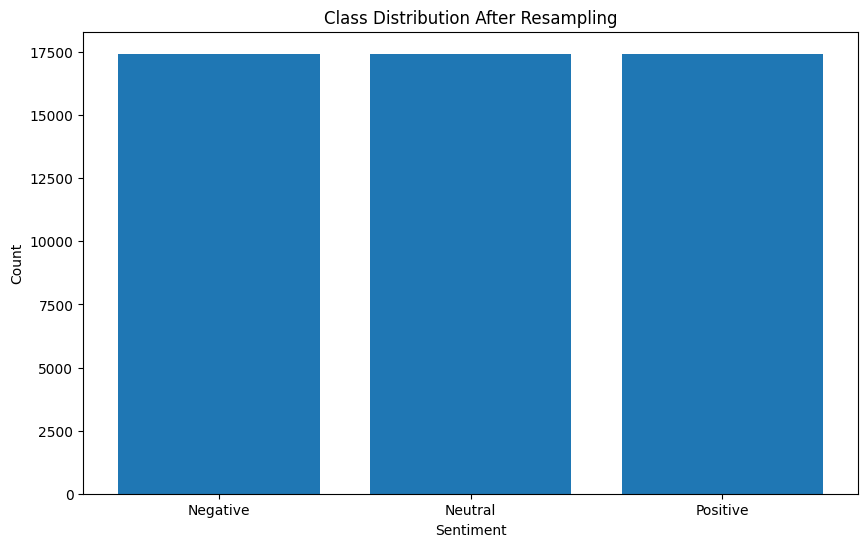

,Review Text,Sentiment
0,"(0, 4591)\t0.006343735886344085\n (0, 10561...",0
1,"(0, 10773)\t0.0807436081933682\n (0, 16265)...",0
2,"(0, 17939)\t0.06264342441037764\n (0, 13697...",0
3,"(0, 13697)\t0.1884505396794023\n (0, 9262)\...",0
4,"(0, 2531)\t0.006765195840845725\n (0, 2934)...",0
...,...,...
52300,"(0, 12133)\t0.30660899006202313\n (0, 15589...",2
52301,"(0, 8989)\t0.30480610092271654\n (0, 5923)\...",2
52302,"(0, 7522)\t0.34958106419006746\n (0, 7991)\...",2
52303,"(0, 5218)\t0.4032184552778333\n (0, 14044)\...",2


In [37]:
# Visualize the class distribution after resampling
plt.figure(figsize=(10, 6))
plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values())
plt.title('Class Distribution After Resampling')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'])
plt.show()

# Save the balanced dataset as df
balanced_df.to_csv('/kaggle/working/womenclothing/balanced_dataset.csv', index=False)
balanced_df

In [38]:
from scipy.sparse import csr_matrix

In [39]:
# Get the trained TfidfVectorizer from your TF-IDF pipeline
tfidf_vectorizer = tfidf_pipeline.named_steps['tfidf']

# Convert the TF-IDF transformed data back to the original text format
X_text_original = tfidf_vectorizer.inverse_transform(X_resampled)

# Create a new DataFrame with the original text format
df_original = pd.DataFrame({'Review Text': [' '.join(row) for row in X_text_original], 'Sentiment': y_resampled})

In [40]:
df_original

,Review Text,Sentiment
0,dress online though even sized prettier right ...,0
1,overall top tight great lot away style nice go...,0
2,would shirt lot also since looks good somethin...,0
3,shirt material butthe fit returned look price ...,0
4,cheap color looks feels way still pictured wor...,0
...,...,...
52300,purse taken couple thing wrinkle hours plan go...,2
52301,loves florida sophisticated classy husband tri...,2
52302,improved jazzed accessorized saturday incredib...,2
52303,exchanging sizes beautiful wide good may large...,2


In [41]:
!pip install transformers

In [42]:
from sklearn.model_selection import train_test_split, KFold
import torch.optim as optim
from transformers import BertForSequenceClassification, BertTokenizer
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from transformers import BertModel

In [43]:
# Tokenize the "Review Text" column
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_inputs = tokenizer(df_original['Review Text'].tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)
input_ids = tokenized_inputs.input_ids
attention_masks = tokenized_inputs.attention_mask
y = df_original['Sentiment']

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [44]:
# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(input_ids, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [45]:
# Define the number of splits for KFold
num_splits = 10
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

In [46]:
# Define lists to store metrics for each fold
train_losses_per_fold = []
valid_losses_per_fold = []
accuracies_per_fold = []

In [47]:
# Define the model with activation function and regularization
class BertWithActivationAndRegularization(nn.Module):
    def __init__(self, pretrained_model_name, num_labels, dropout_prob=0.5, weight_decay=0.01):
        super(BertWithActivationAndRegularization, self).__init__()
        self.bert = BertModel.from_pretrained(pretrained_model_name)
        self.dropout = nn.Dropout(dropout_prob)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)
        self.activation = nn.GELU()
        self.weight_decay = weight_decay
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        logits = self.activation(logits)  # Applying GELU activation function
        return logits

In [48]:
# Loop over each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}/{num_splits}")
    # Split the data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]  # Updated this line

Fold 1/10
Fold 2/10
Fold 3/10
Fold 4/10
Fold 5/10
Fold 6/10
Fold 7/10
Fold 8/10
Fold 9/10
Fold 10/10


In [49]:
batch_size = 16

In [50]:
# Create PyTorch datasets and data loaders for this fold
train_dataset = TensorDataset(X_train_fold.cuda(), attention_masks[train_index].cuda(), torch.tensor(y_train_fold.values).cuda())
val_dataset = TensorDataset(X_val_fold.cuda(), attention_masks[val_index].cuda(), torch.tensor(y_val_fold.values).cuda())
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [121]:
# Specify the pretrained BERT model name
model_name = 'bert-base-uncased'

# Create an instance of the model
model = BertWithActivationAndRegularization(pretrained_model_name='bert-base-uncased', num_labels=3)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [52]:
import torch.optim as optim

# Define the optimizer and criterion
learning_rate = 2e-06
weight_decay = 0.0001  
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()

In [53]:
# Lists to store losses for this fold
train_losses_fold = []
valid_losses_fold = []
accuracies_fold = []

In [54]:
# Training loop
epochs = 6
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs
        loss = criterion(logits, labels)
        total_train_loss += loss.item()

        _, predicted = torch.max(logits, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

        loss.backward()
        optimizer.step()

    average_train_loss = total_train_loss / len(train_dataloader)
    train_losses_fold.append(average_train_loss)

    # Validation loop
    model.eval()
    total_valid_loss = 0
    correct_valid = 0
    total_valid = 0
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs
            loss = criterion(logits, labels)
            total_valid_loss += loss.item()
            
            _, predicted = torch.max(logits, 1)
            correct_valid += (predicted == labels).sum().item() 
            total_valid += labels.size(0)

    average_valid_loss = total_valid_loss / len(val_dataloader)
    valid_losses_fold.append(average_valid_loss)

    # Calculate accuracy for this fold
    accuracy_train = correct_train / total_train
    accuracy_valid = correct_valid / total_valid
    accuracies_fold.append((accuracy_train, accuracy_valid))

    print(f'Epoch {epoch+1}/{epochs} - Training Loss: {average_train_loss:.4f} - Validation Loss: {average_valid_loss:.4f} - Training Accuracy: {accuracy_train:.4f} - Validation Accuracy: {accuracy_valid:.4f}')

# Save metrics for this fold
train_losses_per_fold.append(train_losses_fold)
valid_losses_per_fold.append(valid_losses_fold)
accuracies_per_fold.append(accuracies_fold)

Epoch 1/6 - Training Loss: 0.8082 - Validation Loss: 0.6425 - Training Accuracy: 0.5898 - Validation Accuracy: 0.6987
Epoch 2/6 - Training Loss: 0.6055 - Validation Loss: 0.5575 - Training Accuracy: 0.7155 - Validation Accuracy: 0.7482
Epoch 3/6 - Training Loss: 0.5313 - Validation Loss: 0.5387 - Training Accuracy: 0.7618 - Validation Accuracy: 0.7604
Epoch 4/6 - Training Loss: 0.4694 - Validation Loss: 0.4698 - Training Accuracy: 0.7989 - Validation Accuracy: 0.8006
Epoch 5/6 - Training Loss: 0.4039 - Validation Loss: 0.4447 - Training Accuracy: 0.8355 - Validation Accuracy: 0.8227
Epoch 6/6 - Training Loss: 0.3416 - Validation Loss: 0.4017 - Training Accuracy: 0.8665 - Validation Accuracy: 0.8435


In [55]:
 # Debugging print statements to check the lengths
print("Length of train_losses_fold:", len(train_losses_fold))
print("Length of valid_losses_fold:", len(valid_losses_fold)) 

Length of train_losses_fold: 6
Length of valid_losses_fold: 6


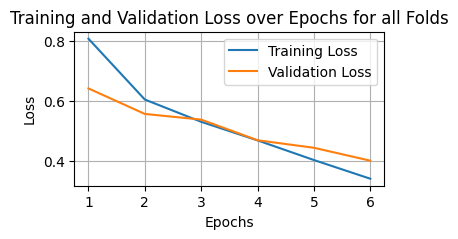

In [56]:
# Plotting training and validation losses for all folds
num_epochs = len(train_losses_fold)
plt.figure(figsize=(4, 2))
plt.plot(range(1, num_epochs + 1), train_losses_fold, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses_fold, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs for all Folds')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
from transformers import BertModel

# Instantiate the model architecture
model_name = 'bert-base-uncased'
model = BertModel.from_pretrained(model_name)

# Save the model's state dictionary
model.save_pretrained("/kaggle/working/logs/")

In [123]:
# Load the saved model from the specified path
model = BertModel.from_pretrained("/kaggle/working/logs/")

# RoBERTa model

In [61]:
X_text = df['Review Text']  # Text data```
y = df['Sentiment']  # Target variable

In [62]:
# Convert sentiment labels to 2, 1, 0
label_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
y = y.map(label_mapping)

In [63]:
# Define the resampling techniques
over_sampling_strategy = {2: 17435, 1: 2823, 0: 2370}
under_sampling_strategy = {2: 2370, 1: 2370, 0: 2370}
over_sampler = SMOTE(sampling_strategy=over_sampling_strategy)
under_sampler = RandomUnderSampler(sampling_strategy=under_sampling_strategy)

In [64]:
# Apply resampling
X_resampled, y_resampled = resampling_pipeline.fit_resample(X_tfidf, y)

In [65]:
# Print the output of each step in the pipeline
print("Output after TF-IDF transformation:")
print(X_resampled)

Output after TF-IDF transformation:
  (0, 7413)	0.27413234528199404
  (0, 5246)	0.26337631489465496
  (0, 9715)	0.24498875949737942
  (0, 12108)	0.1650805839408661
  (0, 17170)	0.1989738958541982
  (0, 816)	0.2173614512514737
  (0, 9707)	0.17594555754081112
  (0, 5280)	0.19213429935393866
  (0, 2045)	0.15551034358365767
  (0, 12375)	0.16831403253087468
  (0, 10674)	0.14285344927806784
  (0, 12258)	0.14042791603716154
  (0, 5623)	0.1813782689665996
  (0, 12479)	0.12363249649447347
  (0, 14205)	0.11679911619459052
  (0, 12313)	0.14884356616357675
  (0, 1260)	0.1766087829598841
  (0, 16305)	0.11296778335732773
  (0, 9433)	0.14594270197920514
  (0, 578)	0.1337802232473899
  (0, 13757)	0.09570128075546036
  (0, 15428)	0.2799013921425203
  (0, 12097)	0.10021536971115012
  (0, 5742)	0.13228622847772378
  (0, 9695)	0.20679299519335875
  :	:
  (52304, 11681)	0.2916274829202017
  (52304, 893)	0.19517903315068058
  (52304, 700)	0.15324412999992323
  (52304, 14837)	0.19249503973690546
  (52304, 12

In [66]:
# Check the class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))

Class distribution after resampling: Counter({0: 17435, 1: 17435, 2: 17435})


In [67]:
# Convert X_resampled and y_resampled to DataFrame
balanced_df = pd.DataFrame({'Review Text': X_resampled, 'Sentiment': y_resampled})

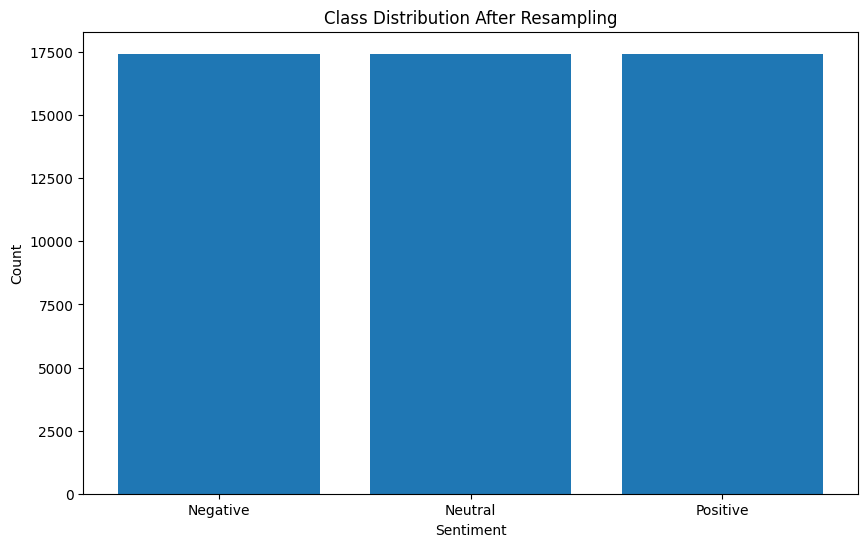

,Review Text,Sentiment
0,"(0, 7413)\t0.27413234528199404\n (0, 5246)\...",0
1,"(0, 8967)\t0.0695619682073513\n (0, 2934)\t...",0
2,"(0, 1787)\t0.005094104232613873\n (0, 14288...",0
3,"(0, 17339)\t0.18043138324085845\n (0, 17884...",0
4,"(0, 12344)\t0.04599285146981243\n (0, 17032...",0
...,...,...
52300,"(0, 12202)\t0.41522885677369914\n (0, 4142)...",2
52301,"(0, 11663)\t0.25362059115430546\n (0, 240)\...",2
52302,"(0, 13401)\t0.2845366674198441\n (0, 8606)\...",2
52303,"(0, 4894)\t0.22968491883208933\n (0, 9691)\...",2


In [68]:
# Visualize the class distribution after resampling
plt.figure(figsize=(10, 6))
plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values())
plt.title('Class Distribution After Resampling')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'])
plt.show()

# Save the balanced dataset as df
balanced_df.to_csv('balanced_dataset.csv', index=False)
balanced_df

In [69]:
from scipy.sparse import csr_matrix

In [70]:
# Get the trained TfidfVectorizer from your TF-IDF pipeline
tfidf_vectorizer = tfidf_pipeline.named_steps['tfidf']

# Convert the TF-IDF transformed data back to the original text format
X_text_original = tfidf_vectorizer.inverse_transform(X_resampled)

# Create a new DataFrame with the original text format
df_original = pd.DataFrame({'Review Text': [' '.join(row) for row in X_text_original], 'Sentiment': y_resampled})

In [71]:
df_original

,Review Text,Sentiment
0,ias existing moderately purchasing view assume...,0
1,love color style going reviews problem clean s...,0
2,bought small tight go large feel looking somet...,0
3,wanted work color big doesnt quality shape goo...,0
4,really usual overall well nice big material ri...,0
...,...,...
52300,quilting detailing highly thicker plan extreme...,2
52301,poorl ag hug quest brands tightly therefore ev...,2
52302,secular level loser teeny art ag teacher frien...,2
52303,elements modal elevate midriff conscious basic...,2


In [72]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.model_selection import train_test_split, KFold
import torch.optim as optim
from transformers import RobertaModel

In [73]:
# Tokenize the "Review Text" column
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
tokenized_inputs = tokenizer(df_original['Review Text'].tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)
input_ids = tokenized_inputs.input_ids
attention_masks = tokenized_inputs.attention_mask
y = df_original['Sentiment']

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [74]:
# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(input_ids, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [75]:
# Define the number of splits for KFold
num_splits = 10
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

In [76]:
# Define lists to store metrics for each fold
train_losses_per_fold = []
valid_losses_per_fold = []
accuracies_per_fold = []

In [77]:
# Define the model with activation function and regularization
class RobertaWithActivationAndRegularization(nn.Module):
    def __init__(self, pretrained_model_name, num_labels, dropout_prob=0.5, weight_decay=0.01):
        super(RobertaWithActivationAndRegularization, self).__init__()
        self.roberta = RobertaModel.from_pretrained(pretrained_model_name)
        self.dropout = nn.Dropout(dropout_prob)
        self.classifier = nn.Linear(self.roberta.config.hidden_size, num_labels)
        self.activation = nn.GELU()
        self.weight_decay = weight_decay
        
    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        logits = self.activation(logits)  # Applying GELU activation function
        return logits

In [78]:
# Loop over each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}/{num_splits}")
    # Split the data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]  # Updated this line

Fold 1/10
Fold 2/10
Fold 3/10
Fold 4/10
Fold 5/10
Fold 6/10
Fold 7/10
Fold 8/10
Fold 9/10
Fold 10/10


In [79]:
batch_size = 16

In [80]:
# Create PyTorch datasets and data loaders for this fold
train_dataset = TensorDataset(X_train_fold.cuda(), attention_masks[train_index].cuda(), torch.tensor(y_train_fold.values).cuda())
val_dataset = TensorDataset(X_val_fold.cuda(), attention_masks[val_index].cuda(), torch.tensor(y_val_fold.values).cuda())
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [81]:
# Specify the pretrained BERT model name
model_name = 'roberta-base'

# Create an instance of the model
model = RobertaWithActivationAndRegularization(pretrained_model_name='roberta-base', num_labels=3)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaWithActivationAndRegularization(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
       

In [82]:
import torch.optim as optim

# Define the optimizer and criterion
learning_rate = 2e-06
weight_decay = 0.0001  
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()

In [83]:
# Lists to store losses for this fold
train_losses_fold = []
valid_losses_fold = []
accuracies_fold = []

In [84]:
# Training loop
epochs = 6
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs
        loss = criterion(logits, labels)
        total_train_loss += loss.item()

        _, predicted = torch.max(logits, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

        loss.backward()
        optimizer.step()

    average_train_loss = total_train_loss / len(train_dataloader)
    train_losses_fold.append(average_train_loss)

    # Validation loop
    model.eval()
    total_valid_loss = 0
    correct_valid = 0
    total_valid = 0
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs
            loss = criterion(logits, labels)
            total_valid_loss += loss.item()
            
            _, predicted = torch.max(logits, 1)
            correct_valid += (predicted == labels).sum().item() 
            total_valid += labels.size(0)

    average_valid_loss = total_valid_loss / len(val_dataloader)
    valid_losses_fold.append(average_valid_loss)

    # Calculate accuracy for this fold
    accuracy_train = correct_train / total_train
    accuracy_valid = correct_valid / total_valid
    accuracies_fold.append((accuracy_train, accuracy_valid))

    print(f'Epoch {epoch+1}/{epochs} - Training Loss: {average_train_loss:.4f} - Validation Loss: {average_valid_loss:.4f} - Training Accuracy: {accuracy_train:.4f} - Validation Accuracy: {accuracy_valid:.4f}')

# Save metrics for this fold
train_losses_per_fold.append(train_losses_fold)
valid_losses_per_fold.append(valid_losses_fold)
accuracies_per_fold.append(accuracies_fold)

Epoch 1/6 - Training Loss: 0.7561 - Validation Loss: 0.5857 - Training Accuracy: 0.6203 - Validation Accuracy: 0.7252
Epoch 2/6 - Training Loss: 0.5754 - Validation Loss: 0.5787 - Training Accuracy: 0.7314 - Validation Accuracy: 0.7271
Epoch 3/6 - Training Loss: 0.5191 - Validation Loss: 0.5230 - Training Accuracy: 0.7671 - Validation Accuracy: 0.7766
Epoch 4/6 - Training Loss: 0.4757 - Validation Loss: 0.4753 - Training Accuracy: 0.7900 - Validation Accuracy: 0.7970
Epoch 5/6 - Training Loss: 0.4310 - Validation Loss: 0.4421 - Training Accuracy: 0.8155 - Validation Accuracy: 0.8197
Epoch 6/6 - Training Loss: 0.3893 - Validation Loss: 0.4083 - Training Accuracy: 0.8378 - Validation Accuracy: 0.8421


In [85]:
 # Debugging print statements to check the lengths
print("Length of train_losses_fold:", len(train_losses_fold))
print("Length of valid_losses_fold:", len(valid_losses_fold)) 

Length of train_losses_fold: 6
Length of valid_losses_fold: 6


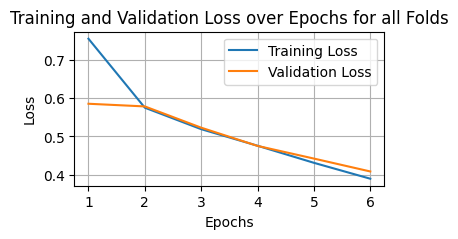

In [86]:
# Plotting training and validation losses for all folds
num_epochs = len(train_losses_fold)
plt.figure(figsize=(4, 2))
plt.plot(range(1, num_epochs + 1), train_losses_fold, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses_fold, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs for all Folds')
plt.legend()
plt.grid(True)
plt.show()

In [117]:
from transformers import RobertaModel

model = RobertaModel.from_pretrained(model_name)

# Save the model's state dictionary
model.save_pretrained("/kaggle/working/logs/")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [118]:
# Load the saved model from the specified path
model = RobertaModel.from_pretrained("/kaggle/working/logs/")

# Ensemble model